# Clustering, k-means
Cluster the data sets train_smpl, **`train_smpl_<label>`** (apply required filters and/or attribute selections if needed), using the k-means algorithm:
* First try to work in a classical clustering scenario and assume that classes are not given. Research methods which allow you to visualise and analyse clusters (and the performance of the clustering algorithm on your data set).
* Note the accuracy of k-means relative to the given clusters.

In [2]:
 from Scripts import helperfn as hf
 from sklearn.cluster import KMeans
 import numpy as np
 import matplotlib.pyplot as plt


In [26]:
X = hf.get_data_noresults()

Y = hf.get_results(-1)
X, Y = hf.balance_by_class(X, Y, size=None, allow_imbalance=False)

#reset index inorder to match cluster indicies for checking what clustersa true labels are
X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)

In [27]:
# 10 clusters due to 10 classes, or 2 because of reuslt datasheet
kmeans = KMeans(n_clusters=10, max_iter=500).fit(X)

In [30]:
from collections import Counter, defaultdict

def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]

cluster = {}

for i in range(len(np.unique(Y))):
    indecies = ClusterIndicesNumpy(i, kmeans.labels_)
    inCluster = Y.to_numpy()[indecies].flatten()

    cluster[i] = Counter(inCluster)
    print("cluster-", i, "classes:- ", Counter(inCluster))

cluster- 0 classes:-  Counter({6: 88, 3: 76, 4: 67, 8: 33, 5: 30, 7: 22, 2: 19, 1: 14, 9: 2})
cluster- 1 classes:-  Counter({0: 67, 2: 58, 1: 49, 4: 40, 8: 18, 5: 2, 3: 1})
cluster- 2 classes:-  Counter({9: 31, 6: 29, 8: 16, 3: 13, 1: 4, 5: 2, 2: 1, 4: 1})
cluster- 3 classes:-  Counter({7: 101, 2: 51, 5: 42, 4: 38, 8: 30, 1: 26, 0: 18, 9: 9, 3: 7})
cluster- 4 classes:-  Counter({9: 109, 5: 86, 6: 64, 8: 63, 3: 51, 2: 44, 1: 40, 7: 37, 4: 31, 0: 23})
cluster- 5 classes:-  Counter({5: 30})
cluster- 6 classes:-  Counter({0: 55, 1: 40, 3: 20, 2: 17, 6: 17, 8: 15, 4: 12, 9: 11, 7: 9, 5: 7})
cluster- 7 classes:-  Counter({8: 35, 1: 23, 9: 13, 4: 7, 5: 5, 3: 3, 2: 2, 0: 1})
cluster- 8 classes:-  Counter({7: 41, 9: 35, 3: 25, 2: 13, 6: 12, 1: 11, 4: 10, 0: 8, 5: 6})
cluster- 9 classes:-  Counter({0: 38, 3: 14, 2: 5, 4: 4, 1: 3})


In [129]:
# cluster[0][0]
# classes =  np.zeros(shape=(10,10))

classes = []

#2d array count of 0 class all clusters
for i in range(len(np.unique(Y))):
    temp = []
    for j in range(len(np.unique(Y))):
        temp.append(cluster[i].get(j,0))
    classes.append(temp)

classes = np.array(classes).T


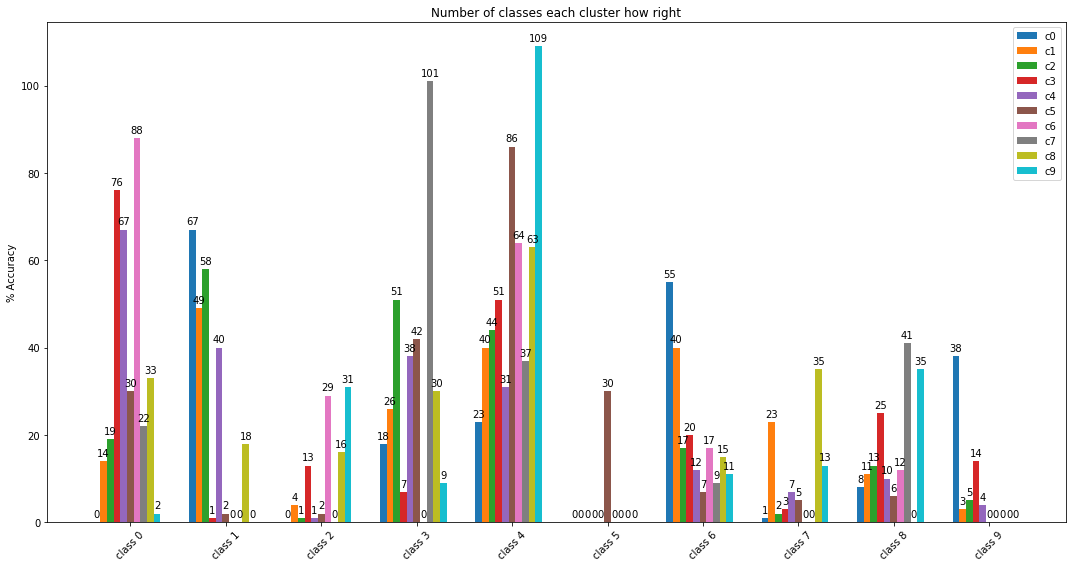

In [130]:
from Scripts import plotScripts as ps

ps.plot_scores(classes, ["c0", "c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9"], title="Number of classes each cluster how right", labels=["class 0", "class 1", "class 2", "class 3", "class 4", "class 5", "class 6", "class 7", "class 8", "class 9"], bar_width=0.07, figure_size=(15, 8))

# plt.savefig('foo.png',dpi=400)

163  :  140


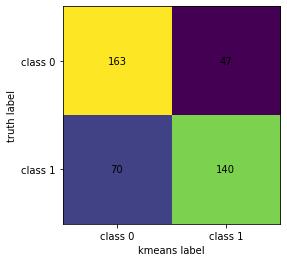

In [218]:
from sklearn.metrics import confusion_matrix
from Scripts import confusionMatrix as mat

cm = confusion_matrix(Y, kmeans.labels_)


# Plot confusion matrix
plt.imshow(cm,interpolation='none')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')

#if true then claster 0 is class 0
if cm[0][0] == countSame()[0]:
    plt.xticks(np.arange(0,2), ['class 0', 'class 1'])
    plt.yticks(np.arange(0,2), ['class 0', 'class 1'])
else:
    plt.xticks(np.arange(0,2), ['class 1', 'class 0'])
    plt.yticks(np.arange(0,2), ['class 1', 'class 0'])

plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.show()

In [212]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, kmeans.labels_)

0.2785714285714286